In [724]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas
import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})

In [725]:
os.chdir('/Users/sreelakshmirajendrakumar/Downloads')

dataset_pendigits_test = pandas.read_csv('pendigits_test.csv')
dataset_pendigits_train = pandas.read_csv('pendigits_train.csv')
dataset_class_2D = pandas.read_csv('class_2D.csv')

In [726]:
'defining X and y'
X=dataset_class_2D.iloc[:,1:3]
X=X.to_numpy()
y=dataset_class_2D.iloc[:,3]
y=y.to_numpy()
N,d=np.shape(X)

gamma_1=np.zeros(N,)+0.1
gamma_2=np.zeros(N,)+0.5
gamma_3=np.zeros(N,)+1

tolerance=10**(-5)
rho_1=0.002
rho_2=0.0004
rho_3=0.0002

In [727]:
def generateDiagonalY(N=N,y=y):
    'creating a matrix with diagonal values equal to the elements in y'
    diagonal_y=np.zeros((N,N))
    for i in range(0,len(diagonal_y)):
        for j in range(0,len(diagonal_y)):
            if i==j:
                diagonal_y[i][j]=y[i]
    return diagonal_y

diagonal_y=generateDiagonalY()

In [728]:
def attachOnes(X=X):
    'attaching ones to the first column of the input matrix X'
    to_attach=np.zeros((len(X),1))
    to_attach+=1
    attached=np.concatenate((to_attach,X),axis=1)
    return attached

attached_x=attachOnes()
A=np.matmul(diagonal_y,attached_x)
W=np.matmul(diagonal_y,X)

In [729]:
def getU(the_z,gamma):
    u=np.zeros(len(gamma),)
    for i in range(0,len(u)):
        if the_z[i]<1:
            u[i]=(-1)*gamma[i]
    return u

In [730]:
initial_beta_zero=np.random.rand(1,)
initial_b=np.random.rand(d,)
initial_z=np.random.rand(N,)
initial_u=np.random.rand(N,)

temp_beta_zero=np.zeros(1,)
temp_b=np.zeros((N,d))
temp_z=np.zeros(N,)
temp_u=np.zeros(N,)

current_beta_zero_1=initial_beta_zero
current_b_1=initial_b
current_z_1=initial_z
current_u_1=initial_u


'iterations when gamma=0.1'
while True:
    temp_beta_zero=current_beta_zero_1
    temp1=current_z_1-current_u_1-np.matmul(W,current_b_1)
    current_beta_zero_1=(np.matmul(y.T,temp1)/(np.matmul(y.T,y)))
    
    temp_b=current_b_1
    temp2=rho_1*np.identity(d)+np.matmul(W.T,W)
    temp3=np.linalg.inv(temp2)
    temp4=current_z_1-current_u_1-current_beta_zero_1*y
    temp5=np.matmul(temp3,W.T)
    current_b_1=np.matmul(temp5,temp4)
    
    temp_z=current_z_1
    temp6=getU(temp_z,gamma_1)
    current_z_1=-rho_1*temp6+(y*current_beta_zero_1)+np.matmul(W,current_b_1)+current_u_1
    
    temp_u=current_u_1
    temp7=temp_u+(y*current_beta_zero_1)+np.matmul(W,current_b_1)-current_z_1
    current_u_1=temp7
    
    if abs(temp_beta_zero-current_beta_zero_1)<tolerance:
        temp8=abs(temp_b-current_b_1)
        if np.all(temp8<tolerance):
            break
       

In [731]:
initial_beta_zero=np.random.rand(1,)
initial_b=np.random.rand(d,)
initial_z=np.random.rand(N,)
initial_u=np.random.rand(N,)

temp_beta_zero=np.zeros(1,)
temp_b=np.zeros((N,d))
temp_z=np.zeros(N,)
temp_u=np.zeros(N,)

current_beta_zero_2=initial_beta_zero
current_b_2=initial_b
current_z_2=initial_z
current_u_2=initial_u


'iterations when gamma=0.5'
while True:
    temp_beta_zero=current_beta_zero_2
    temp1=current_z_2-current_u_2-np.matmul(W,current_b_2)
    current_beta_zero_2=(np.matmul(y.T,temp1)/(np.matmul(y.T,y)))
    
    temp_b=current_b_2
    temp2=rho_2*np.identity(d)+np.matmul(W.T,W)
    temp3=np.linalg.inv(temp2)
    temp4=current_z_2-current_u_2-current_beta_zero_2*y
    temp5=np.matmul(temp3,W.T)
    current_b_2=np.matmul(temp5,temp4)
    
    temp_z=current_z_2
    temp6=getU(temp_z,gamma_2)
    current_z_2=-rho_2*temp6+(y*current_beta_zero_2)+np.matmul(W,current_b_2)+current_u_2
    
    temp_u=current_u_2
    temp7=temp_u+(y*current_beta_zero_2)+np.matmul(W,current_b_2)-current_z_2
    current_u_2=temp7
    
    if abs(temp_beta_zero-current_beta_zero_2)<tolerance:
        temp8=abs(temp_b-current_b_2)
        if np.all(temp8<tolerance):
            break
       

In [732]:
initial_beta_zero=np.random.rand(1,)
initial_b=np.random.rand(d,)
initial_z=np.random.rand(N,)
initial_u=np.random.rand(N,)

temp_beta_zero=np.zeros(1,)
temp_b=np.zeros((N,d))
temp_z=np.zeros(N,)
temp_u=np.zeros(N,)

current_beta_zero_3=initial_beta_zero
current_b_3=initial_b
current_z_3=initial_z
current_u_3=initial_u


'iterations when gamma=1'
while True:
    temp_beta_zero=current_beta_zero_3
    temp1=current_z_3-current_u_3-np.matmul(W,current_b_3)
    current_beta_zero_3=(np.matmul(y.T,temp1)/(np.matmul(y.T,y)))
    
    temp_b=current_b_3
    temp2=rho_3*np.identity(d)+np.matmul(W.T,W)
    temp3=np.linalg.inv(temp2)
    temp4=current_z_3-current_u_3-current_beta_zero_3*y
    temp5=np.matmul(temp3,W.T)
    current_b_3=np.matmul(temp5,temp4)
    
    temp_z=current_z_3
    temp6=getU(temp_z,gamma_1)
    current_z_3=-rho_3*temp6+(y*current_beta_zero_3)+np.matmul(W,current_b_3)+current_u_3
    
    temp_u=current_u_3
    temp7=temp_u+(y*current_beta_zero_3)+np.matmul(W,current_b_3)-current_z_3
    current_u_3=temp7


    if abs(temp_beta_zero-current_beta_zero_3)<tolerance:
        temp8=abs(temp_b-current_b_3)
        if np.all(temp8<tolerance):
            break
       

In [733]:
print('When gamma=0.1 1_N, b is given by:\n')
print(current_b_1)
print('\n')
print('When gamma=0.1 1_N, beta is given by:\n')
print(current_beta_zero_1)
print('==========================================')

print('When gamma=0.5 1_N, b is given by:\n')
print(current_b_2)
print('\n')
print('When gamma=0.5 1_N, beta is given by:\n')
print(current_beta_zero_2)
print('==========================================')

print('When gamma=1_N, b is given by:\n')
print(current_b_3)
print('\n')
print('When gamma=1_N, beta is given by:\n')
print(current_beta_zero_3)

When gamma=0.1 1_N, b is given by:

[ 0.72683339 -0.73069386]


When gamma=0.1 1_N, beta is given by:

0.6633133954872314
When gamma=0.5 1_N, b is given by:

[ 0.78916785 -0.8335884 ]


When gamma=0.5 1_N, beta is given by:

0.6587508571720428
When gamma=1_N, b is given by:

[ 0.12822392 -0.16404236]


When gamma=1_N, beta is given by:

-0.15063656044478071


In [740]:
def getMargin(b):
    temp=0
    for i in range(0,len(b)):
        temp+=b[i]**2
    margin=1/temp
    return margin

margin_1=getMargin(current_b_1)
margin_2=getMargin(current_b_2)
margin_3=getMargin(current_b_3)

In [743]:
print('when gamma=0.1 1_N, the margin is '+str(margin_1)+'\n')
print('when gamma=0.5 1_N, the margin is '+str(margin_2)+'\n')
print('when gamma= 1_N, the margin is '+str(margin_3)+'\n')

when gamma=0.1 1_N, the margin is 0.9414420385633937

when gamma=0.5 1_N, the margin is 0.7589236978149024

when gamma= 1_N, the margin is 23.067376031073323



In [741]:
def plotLine(start_range,end_range,beta_zero,b):
    X1=np.linspace(start_range,end_range,100)
    X2=(1-beta_zero-b[0]*X1)/b[1]
    X3=(-1-beta_zero-b[0]*X1)/b[1]
    X4=(-beta_zero-b[0]*X1)/b[1]
    
    return X1,X2,X3,X4

Text(0.5, 1.0, 'Viewing the performance of the SVM when $\\gamma = 0.1 1_N$')

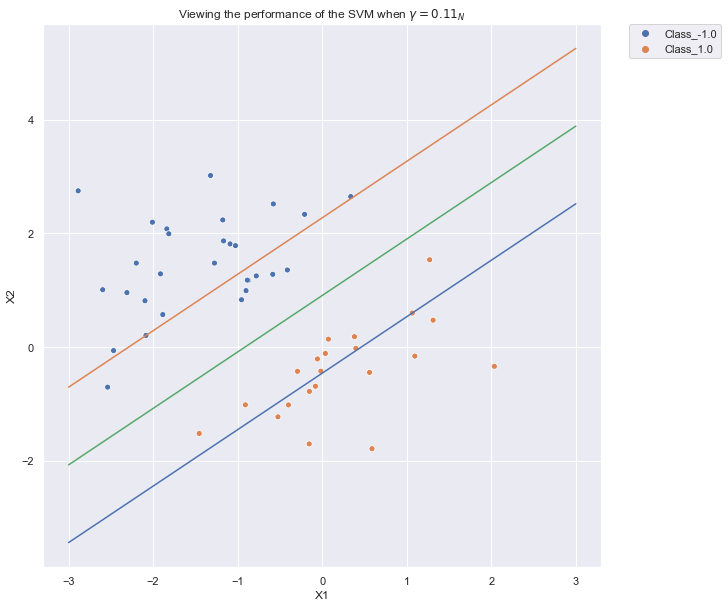

In [735]:
'ploting when gamma=0.1'

a,b,c,d=plotLine(-3,3,current_beta_zero_1,current_b_1)
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,d)
'plotting the data'
label=np.array(y)
labels=[]
for ind in range(0,len(label)):
    labels.append('Class_'+str(label[ind]))

data={'X1':X[:,0],'X2':X[:,1],'Labels':labels}
fig=sns.scatterplot(x='X1',y='X2',hue='Labels',data=data)
fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Viewing the performance of the SVM when $\gamma = 0.1 1_N$')



Text(0.5, 1.0, 'Viewing the performance of the SVM when $\\gamma = 0.5 1_N$')

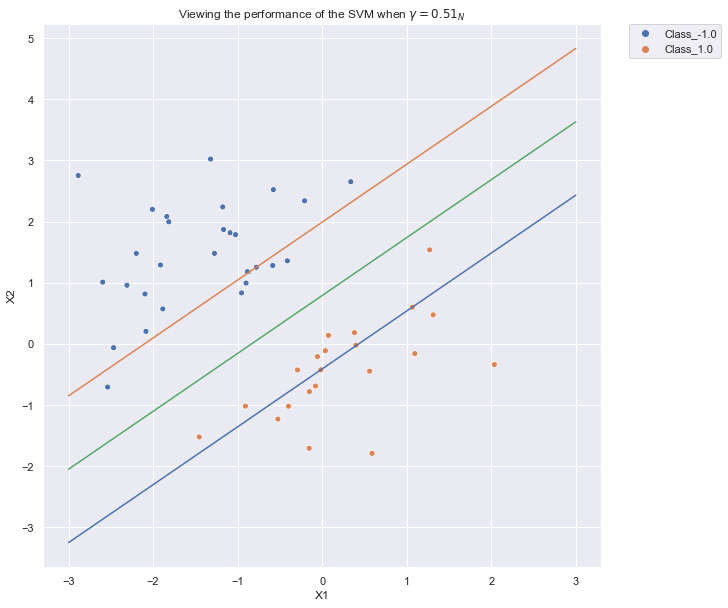

In [736]:
'ploting when gamma=0.5'

a,b,c,d=plotLine(-3,3,current_beta_zero_2,current_b_2)
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,d)
'plotting the data'
label=np.array(y)
labels=[]
for ind in range(0,len(label)):
    labels.append('Class_'+str(label[ind]))

data={'X1':X[:,0],'X2':X[:,1],'Labels':labels}
fig=sns.scatterplot(x='X1',y='X2',hue='Labels',data=data)
fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Viewing the performance of the SVM when $\gamma = 0.5 1_N$')


Text(0.5, 1.0, 'Viewing the performance of the SVM when $\\gamma = 1_N$')

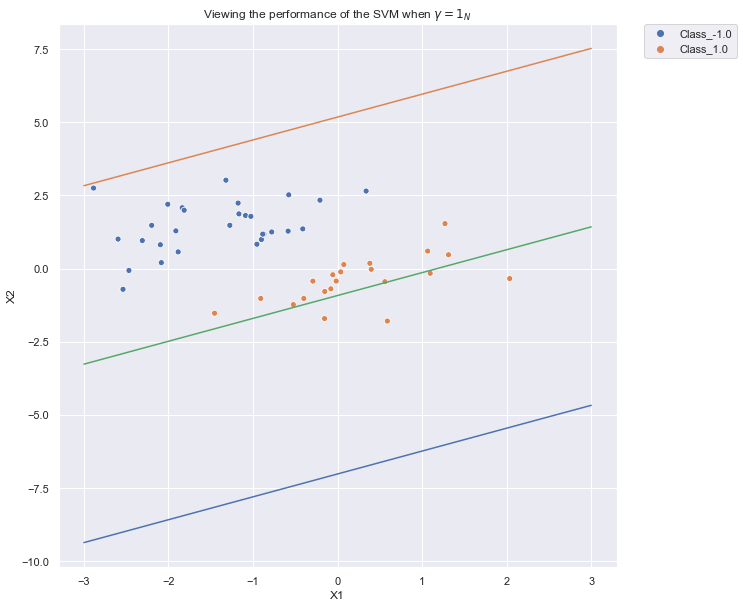

In [737]:
'ploting when gamma=1'

a,b,c,d=plotLine(-3,3,current_beta_zero_3,current_b_3)
plt.plot(a,b)
plt.plot(a,c)
plt.plot(a,d)
'plotting the data'
label=np.array(y)
labels=[]
for ind in range(0,len(label)):
    labels.append('Class_'+str(label[ind]))

data={'X1':X[:,0],'X2':X[:,1],'Labels':labels}
fig=sns.scatterplot(x='X1',y='X2',hue='Labels',data=data)
fig.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Viewing the performance of the SVM when $\gamma = 1_N$')
